Converged after 3 iterations.
Centroids:
 [[-0.11583672 -0.01817529]
 [ 5.14145021  5.06492727]
 [-0.05910111  4.80796255]]
WCSS: 543.3350760666634
Silhouette Score: 0.6444471808170211


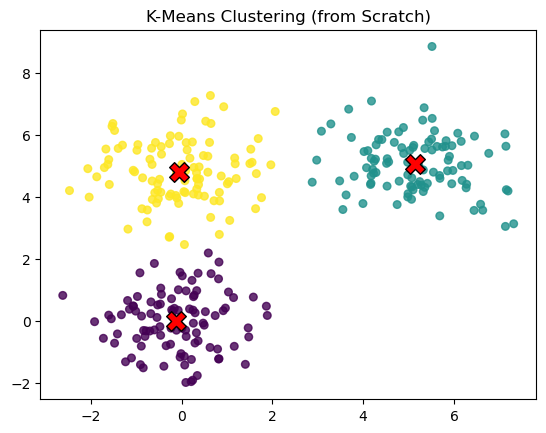

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans  # optional for comparison

def generate_data(num_samples=300, random_seed=42):
    np.random.seed(random_seed)
    mean1, cov1 = [0, 0], [[1, 0], [0, 1]]
    X1 = np.random.multivariate_normal(mean1, cov1, num_samples // 3)
    mean2, cov2 = [5, 5], [[1, 0], [0, 1]]
    X2 = np.random.multivariate_normal(mean2, cov2, num_samples // 3)
    mean3, cov3 = [0, 5], [[1, 0], [0, 1]]
    X3 = np.random.multivariate_normal(mean3, cov3, num_samples // 3)
    X = np.vstack((X1, X2, X3))
    np.random.shuffle(X)
    return X

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tol=1e-4, random_seed=42):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.random_seed = random_seed
        self.centroids = None
        self.labels = None
        
    def _init_centroids(self, X):
        np.random.seed(self.random_seed)
        random_idx = np.random.permutation(len(X))[:self.k]
        self.centroids = X[random_idx]
        
    def fit(self, X):
        self._init_centroids(X)
        for i in range(self.max_iters):
            clusters = self._assign_points_to_clusters(X)
            old_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X, clusters)
            
            # Check convergence
            max_shift = max(euclidean_distance(old_centroids[j], self.centroids[j])
                            for j in range(self.k))
            if max_shift < self.tol:
                print(f"Converged after {i} iterations.")
                break
        
        self.labels = self._assign_points_to_clusters(X, return_labels=True)
        
    def _assign_points_to_clusters(self, X, return_labels=False):
        clusters = [[] for _ in range(self.k)]
        labels = np.zeros(len(X), dtype=int)
        
        for idx, point in enumerate(X):
            distances = [euclidean_distance(point, c) for c in self.centroids]
            cluster_id = np.argmin(distances)
            clusters[cluster_id].append(idx)
            labels[idx] = cluster_id
        
        return labels if return_labels else clusters
    
    def _update_centroids(self, X, clusters):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            if len(cluster) > 0:
                new_centroids[cluster_idx] = np.mean(X[cluster], axis=0)
            else:
                # re-initialize
                new_centroids[cluster_idx] = X[np.random.randint(0, len(X))]
        return new_centroids
    
    def predict(self, X):
        labels = np.zeros(len(X), dtype=int)
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, c) for c in self.centroids]
            labels[i] = np.argmin(distances)
        return labels

def compute_wcss(X, labels, centroids):
    wcss = 0.0
    for i, point in enumerate(X):
        centroid_idx = labels[i]
        wcss += np.sum((point - centroids[centroid_idx])**2)
    return wcss

def plot_clusters(X, labels, centroids=None):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    c='red', s=200, marker='X', edgecolors='k')
    plt.title("K-Means Clustering (from Scratch)")
    plt.show()

# ============= Main Script =============
X = generate_data(num_samples=300, random_seed=42)

kmeans = KMeansScratch(k=3, max_iters=100, tol=1e-4, random_seed=42)
kmeans.fit(X)

labels = kmeans.labels
print("Centroids:\n", kmeans.centroids)

wcss = compute_wcss(X, labels, kmeans.centroids)
print("WCSS:", wcss)

sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

plot_clusters(X, labels, centroids=kmeans.centroids)
